In [16]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import nltk

# Reload the dataset
#file_path = ('/content/sample_data/fake reviews dataset.csv')
data = pd.read_csv('C:/Users/DELL/Desktop/finalproject/fake reviews dataset.csv')

# 1. Rename Columns for Clarity
data.rename(columns={
    "category": "Category",
    "rating": "Rating",
    "label": "Label",
    "text_": "ReviewText"
}, inplace=True)

# 2. Handling Missing Values
if data.isnull().sum().any():
    data.dropna(inplace=True)

# 3. Label Encoding
label_encoder = LabelEncoder()
data["EncodedLabel"] = label_encoder.fit_transform(data["Label"])

# 4. Text Cleaning
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabet characters
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text.strip().lower()

data["CleanedReview"] = data["ReviewText"].apply(clean_text)

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
data["CleanedReview"] = data["CleanedReview"].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop_words)
)

# Save the cleaned dataset to the current directory
cleaned_file_path = "cleaned_fake_reviews_dataset.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaned dataset saved to cleaned_fake_reviews_dataset.csv


In [21]:
import pandas as pd
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the cleaned dataset
cleaned_file_path = "cleaned_fake_reviews_dataset.csv"
data = pd.read_csv(cleaned_file_path)
# Ensure all reviews are strings and handle missing values
data['CleanedReview'] = data['CleanedReview'].fillna("").astype(str)

# Tokenize reviews
stop_words = set(stopwords.words('english'))
data['TokenizedReview'] = data['CleanedReview'].apply(
    lambda x: [word for word in word_tokenize(x) if word not in stop_words]
)


# Tokenize reviews
stop_words = set(stopwords.words('english'))
data['TokenizedReview'] = data['CleanedReview'].apply(
    lambda x: [word for word in word_tokenize(x) if word not in stop_words]
)

# Create a dictionary and corpus for LDA
dictionary = Dictionary(data['TokenizedReview'])
corpus = [dictionary.doc2bow(text) for text in data['TokenizedReview']]

# Train LDA model
num_topics = 5  # You can adjust this
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Display the top words in each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")

# Assign topics to reviews
data['DominantTopic'] = [
    sorted(lda_model[doc], key=lambda x: -x[1])[0][0] if lda_model[doc] else -1 for doc in corpus
]

# Save the results
data.to_csv("reviews_with_topics.csv", index=False)
print("Reviews with topics saved to 'reviews_with_topics.csv'")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 0.068*"book" + 0.013*"watch" + 0.009*"get" + 0.008*"one" + 0.007*"wait" + 0.007*"ill" + 0.007*"back" + 0.007*"go" + 0.006*"dont" + 0.006*"work"
Topic 2: 0.027*"size" + 0.024*"fit" + 0.021*"comfortable" + 0.020*"wear" + 0.015*"im" + 0.014*"little" + 0.014*"ordered" + 0.012*"shoes" + 0.012*"would" + 0.012*"like"
Topic 3: 0.020*"great" + 0.020*"loves" + 0.015*"one" + 0.013*"bought" + 0.012*"little" + 0.012*"would" + 0.011*"son" + 0.010*"good" + 0.009*"well" + 0.009*"use"
Topic 4: 0.048*"story" + 0.011*"enjoyed" + 0.007*"life" + 0.005*"much" + 0.005*"seem" + 0.005*"end" + 0.005*"even" + 0.005*"people" + 0.004*"man" + 0.004*"fall"
Topic 5: 0.035*"read" + 0.021*"good" + 0.021*"characters" + 0.018*"love" + 0.018*"well" + 0.016*"great" + 0.014*"one" + 0.013*"series" + 0.013*"would" + 0.012*"loved"
Reviews with topics saved to 'reviews_with_topics.csv'


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the cleaned dataset
cleaned_file_path = "cleaned_fake_reviews_dataset.csv"
data = pd.read_csv(cleaned_file_path)

# Ensure all reviews are strings and handle missing values
data['CleanedReview'] = data['CleanedReview'].fillna("").astype(str)

# Tokenize reviews (optional, since we're using TF-IDF, this step can be skipped)
# However, if you'd like to clean tokenization more precisely, you can tokenize and join the tokens into strings.
stop_words = set(nltk.corpus.stopwords.words('english'))
data['ProcessedReview'] = data['CleanedReview'].apply(
    lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stop_words and word.isalpha()])
)

# Vectorize the reviews using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your data size
X = vectorizer.fit_transform(data['ProcessedReview'])

# Fit the NMF model
num_topics = 5  # Adjust the number of topics as needed
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]  # Top 10 words per topic
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

# Assign topics to reviews (you can assign the dominant topic based on the largest coefficient)
data['DominantTopic'] = nmf_model.transform(X).argmax(axis=1)

# Save the results to a CSV file
data.to_csv("reviews_with_topics_nmf.csv", index=False)
print("Reviews with topics saved to 'reviews_with_topics_nmf.csv'")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: book read series books reading author enjoyed next loved first
Topic 2: great one little use nice love like would product size
Topic 3: movie good acting watch film great movies action one like
Topic 4: loves son bought toy daughter old dog christmas year play
Topic 5: story characters well developed written told good love enjoyed liked
Reviews with topics saved to 'reviews_with_topics_nmf.csv'


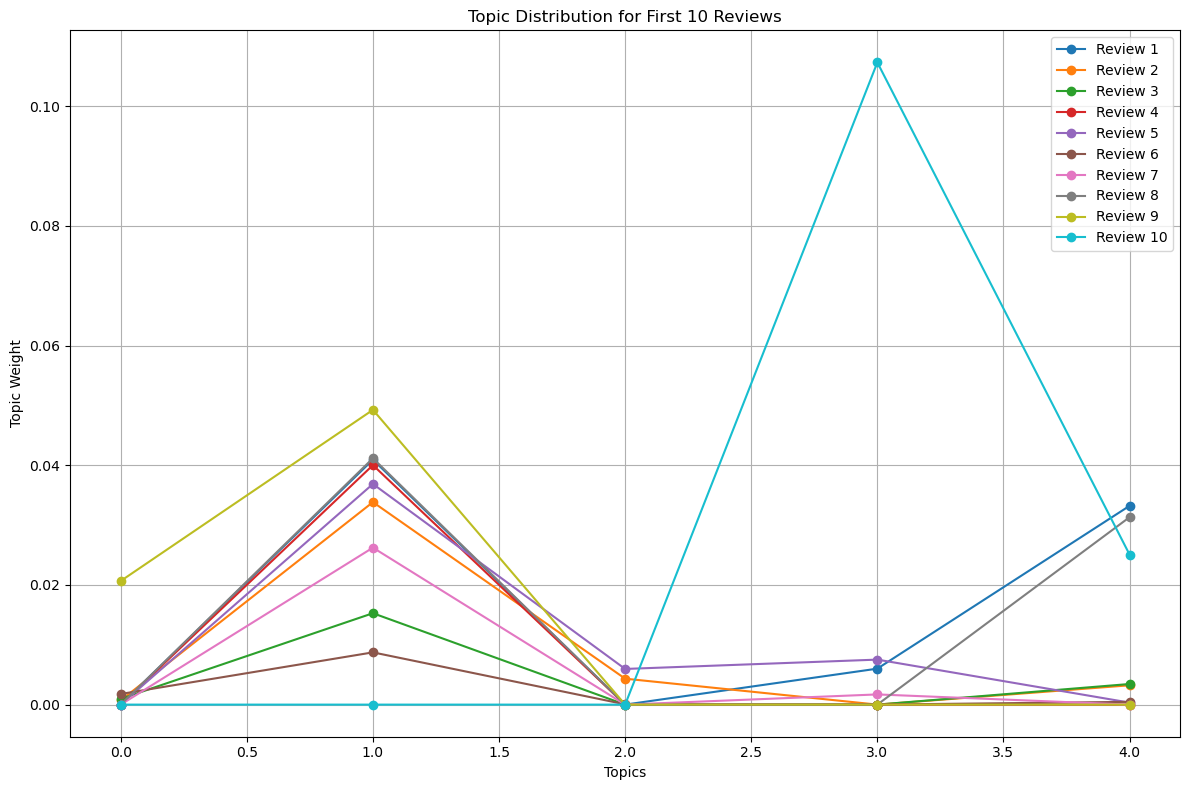

In [31]:
topic_distribution = nmf_model.transform(X)
num_topics = 5  # Or the value you used in your NMF model
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot topic distributions for the first 10 reviews
for i in range(10):  # Adjust the range for the number of reviews you'd like to plot
    plt.plot(range(num_topics), topic_distribution[i], marker='o', label=f"Review {i + 1}")

plt.xlabel("Topics")
plt.ylabel("Topic Weight")
plt.title("Topic Distribution for First 10 Reviews")
plt.legend()
plt.grid(True)  # Add a grid for better visualization
plt.tight_layout()  # Adjust layout for clarity
plt.show()




In [33]:
pip install wordcloud


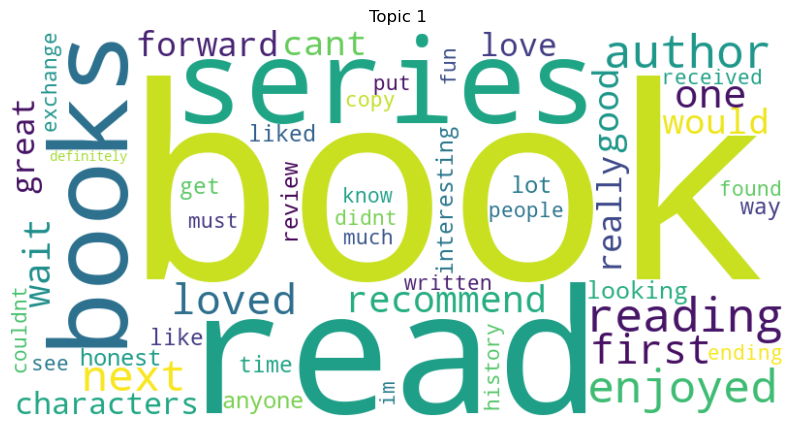

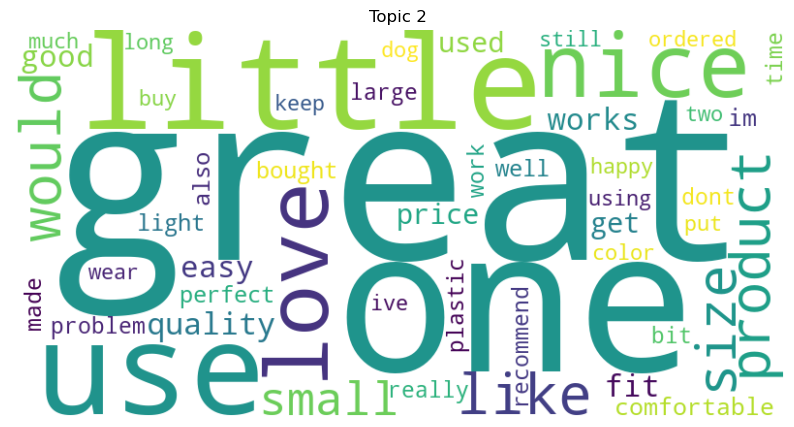

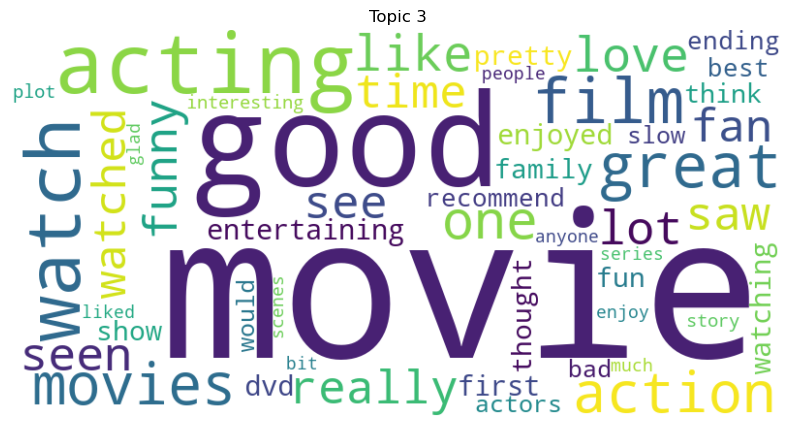

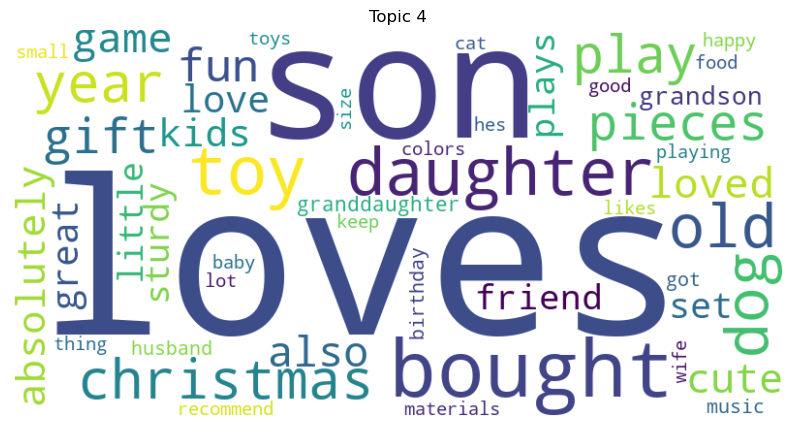

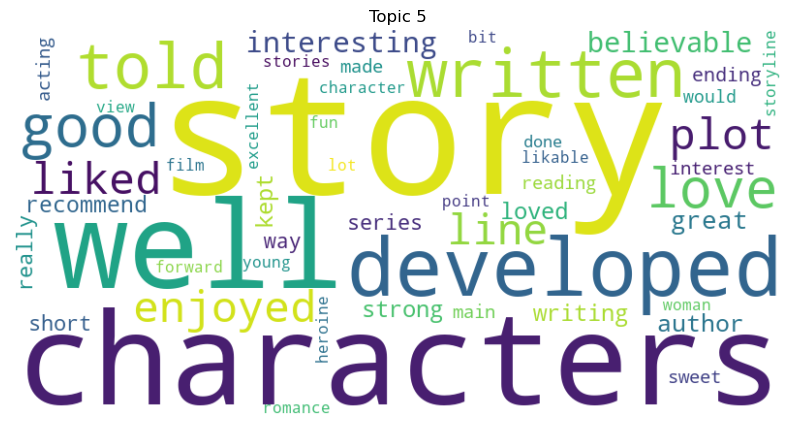

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming `nmf_model` is your NMF model, and `vectorizer` is your TF-IDF vectorizer

# Get the vocabulary from the vectorizer
vocab = vectorizer.get_feature_names_out()

# Create a word cloud for each topic
for topic_idx, topic in enumerate(nmf_model.components_):
    plt.figure(figsize=(10, 6))
    # Generate the word cloud from the topic weights
    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400,
        max_words=50
    ).generate_from_frequencies(dict(zip(vocab, topic)))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_idx + 1}")
    plt.show()


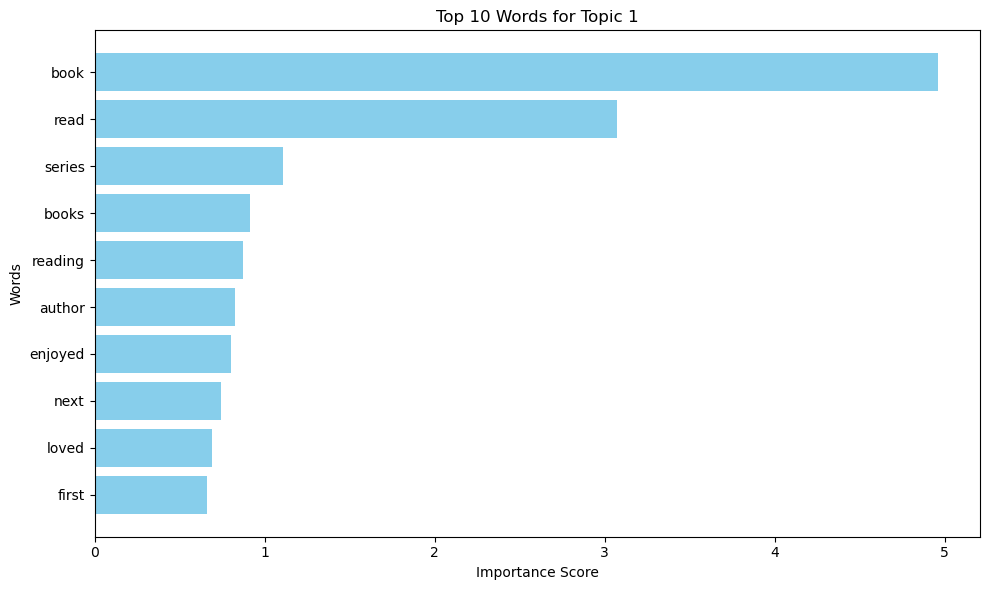

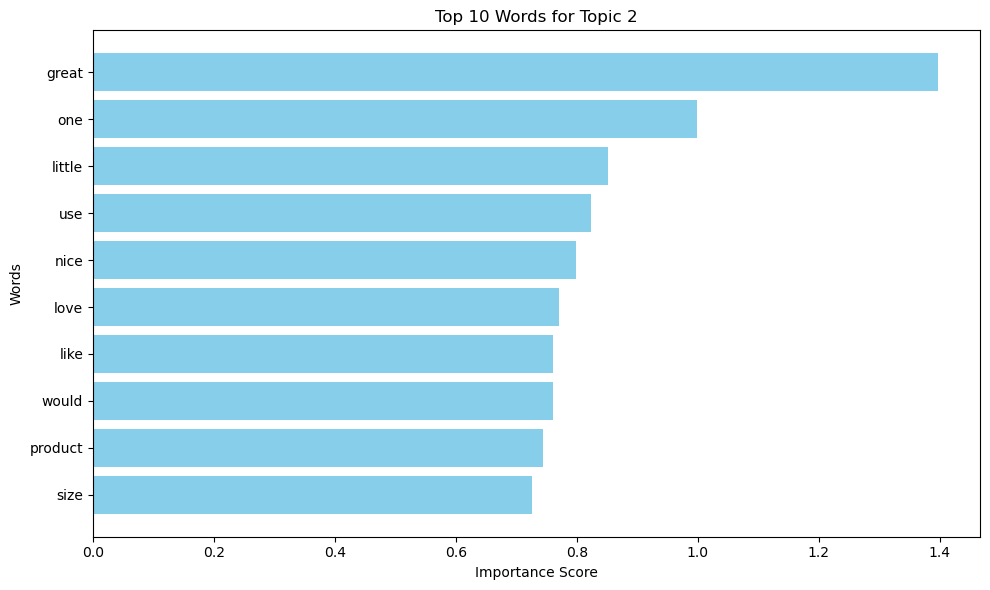

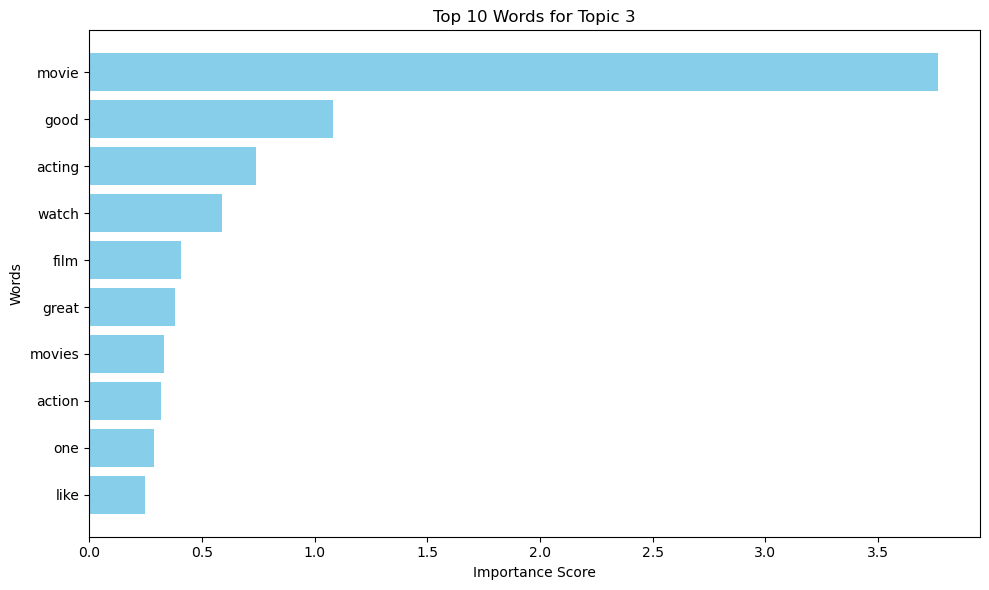

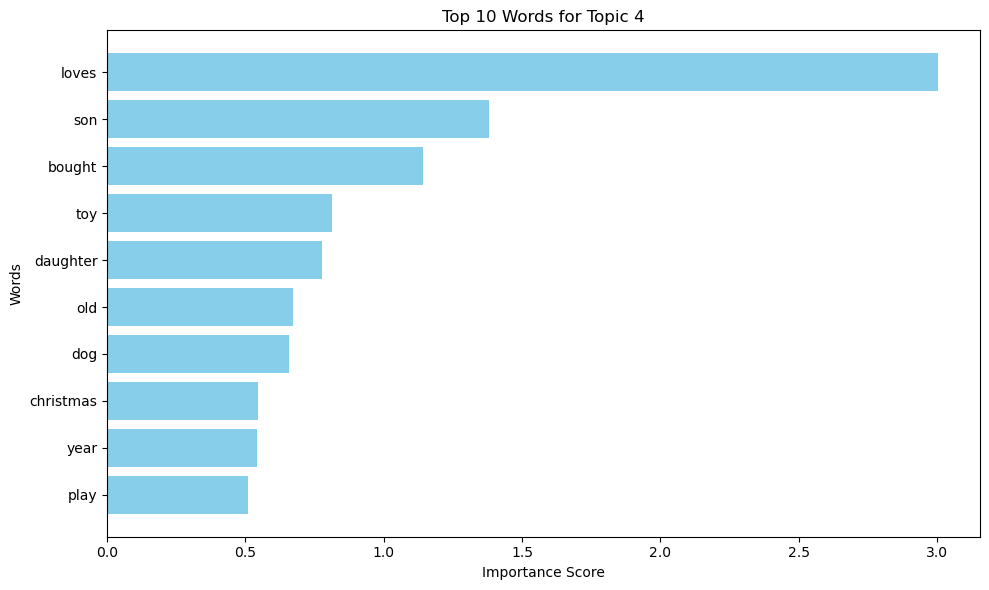

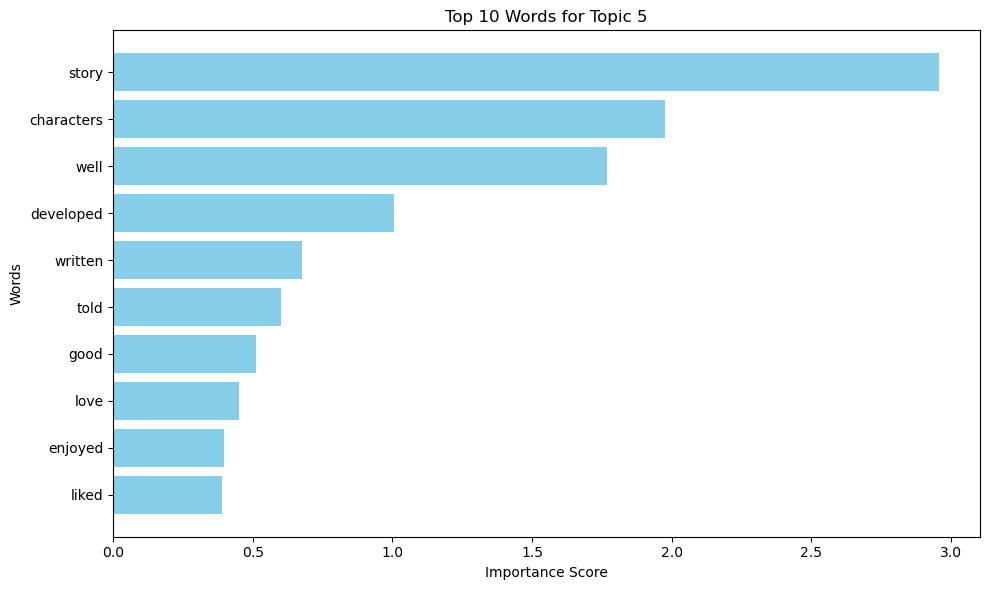

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `nmf_model` is your NMF model and `vectorizer` is your TF-IDF vectorizer

# Get the vocabulary from the vectorizer
vocab = vectorizer.get_feature_names_out()

# Set the number of top words to display for each topic
top_n_words = 10

# Create a bar chart for each topic
for topic_idx, topic in enumerate(nmf_model.components_):
    # Get the top words and their scores
    top_indices = topic.argsort()[:-top_n_words - 1:-1]  # Indices of the top words
    top_words = [vocab[i] for i in top_indices]
    top_scores = topic[top_indices]
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_scores, color='skyblue')
    plt.xlabel("Importance Score")
    plt.ylabel("Words")
    plt.title(f"Top {top_n_words} Words for Topic {topic_idx + 1}")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.show()


In [ ]:
from wordcloud import WordCloud

# Create a word cloud for each topic
for topic_idx, topic in enumerate(nmf.components_):
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400,
        max_words=50
    ).generate_from_frequencies(dict(zip(vocab, topic)))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_idx + 1}")
    plt.show()


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the cleaned dataset
cleaned_file_path = "cleaned_fake_reviews_dataset.csv"
data = pd.read_csv(cleaned_file_path)

# Ensure all reviews are strings and handle missing values
data['CleanedReview'] = data['CleanedReview'].fillna("").astype(str)

# Tokenize reviews (optional step, can also be done during vectorization)
stop_words = set(nltk.corpus.stopwords.words('english'))
data['ProcessedReview'] = data['CleanedReview'].apply(
    lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stop_words and word.isalpha()])
)

# Step 1: Convert reviews to TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=1000)  # Limit the number of features for efficiency
X = vectorizer.fit_transform(data['ProcessedReview'])

# Step 2: Apply K-Means Clustering
num_clusters = 5  # Set the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Step 3: Assign Cluster Labels to Reviews
data['ClusterLabel'] = kmeans.labels_

# Step 4: Display the top words for each cluster
def print_top_words_for_clusters(model, feature_names, num_words=10):
    for i, cluster_centers in enumerate(model.cluster_centers_):
        top_words_idx = cluster_centers.argsort()[:-num_words - 1:-1]
        top_words = [feature_names[j] for j in top_words_idx]
        print(f"Cluster {i + 1}: {' '.join(top_words)}")

# Display top words for each cluster
print("Top words for each K-Means cluster:")
print_top_words_for_clusters(kmeans, vectorizer.get_feature_names_out())

# Step 5: Save the results to a CSV
data.to_csv("reviews_with_clusters.csv", index=False)
print("Reviews with clusters saved to 'reviews_with_clusters.csv'")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top words for each K-Means cluster:
Cluster 1: book read story characters series well enjoyed good author reading
Cluster 2: great good movie love use like well little quality would
Cluster 3: one great bought love good like little would get replace
Cluster 4: loves son bought toy dog daughter great old christmas year
Cluster 5: fit size comfortable wear perfect nice little small great love
Reviews with clusters saved to 'reviews_with_clusters.csv'


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the cleaned dataset
cleaned_file_path = "cleaned_fake_reviews_dataset.csv"
data = pd.read_csv(cleaned_file_path)

# Ensure all reviews are strings and handle missing values
data['CleanedReview'] = data['CleanedReview'].fillna("").astype(str)

# Tokenize reviews (optional step, can also be done during vectorization)
stop_words = set(nltk.corpus.stopwords.words('english'))
data['ProcessedReview'] = data['CleanedReview'].apply(
    lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stop_words and word.isalpha()])
)

# Step 1: Convert reviews to TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=1000)  # Limit the number of features for efficiency
X = vectorizer.fit_transform(data['ProcessedReview'])

# Step 2: Apply DBSCAN Clustering
# epsilon (eps) controls the neighborhood radius for defining a cluster
# min_samples controls the minimum number of points required to form a cluster
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
data['ClusterLabel'] = dbscan.fit_predict(X)

# Step 3: Inspect Results
num_clusters = len(set(data['ClusterLabel'])) - (1 if -1 in data['ClusterLabel'] else 0)
num_outliers = list(data['ClusterLabel']).count(-1)

print(f"Number of Clusters: {num_clusters}")
print(f"Number of Outliers: {num_outliers}")

# Step 4: Display the reviews by cluster
for cluster in set(data['ClusterLabel']):
    if cluster != -1:  # Skip outliers
        print(f"\nReviews in Cluster {cluster}:")
        print(data[data['ClusterLabel'] == cluster]['CleanedReview'].head())

# Step 5: Save the results to a CSV
data.to_csv("reviews_with_dbscan_clusters.csv", index=False)
print("Reviews with DBSCAN clusters saved to 'reviews_with_dbscan_clusters.csv'")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of Clusters: 31
Number of Outliers: 16977

Reviews in Cluster 0:
0    love well made sturdy comfortable love itvery ...
1    love great upgrade original ive mine couple years
2              pillow saved back love look feel pillow
3          missing information use great product price
4                 nice set good quality set two months
Name: CleanedReview, dtype: object

Reviews in Cluster 1:
110          really ruff feet feels sturdy keep feet chair
19945              socks purchased actually stay dogs feet
37260    yo feet xxxw xxxxw actually dont horrendously ...
38029    helps feet especially since carpet feet used h...
39265    dont get th day ended walking min destroyed fe...
Name: CleanedReview, dtype: object

Reviews in Cluster 2:
128     nice sturdy use longterm storage container sma...
608     getting ready move perfect assortment bags clo...
716        great however bags diff sizes ripped first use
1088    bags great bags small enough big enough sorts ...
1511    yu

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the cleaned dataset
cleaned_file_path = "cleaned_fake_reviews_dataset.csv"
data = pd.read_csv(cleaned_file_path)

# Ensure all reviews are strings and handle missing values
data['CleanedReview'] = data['CleanedReview'].fillna("").astype(str)

# Tokenize reviews and remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
data['ProcessedReview'] = data['CleanedReview'].apply(
    lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stop_words and word.isalpha()])
)

# Define the target column (Assuming 'Label' is the column for classification target)
# If the labels are not provided, you'll need to create this column manually
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])  # Assuming the target column is 'Label'

# Split the dataset into training and testing sets
X = data['ProcessedReview']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Convert reviews to TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for efficiency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)
    
    # Evaluate the model
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Logistic Regression Results:
Accuracy: 0.8454
              precision    recall  f1-score   support

          CG       0.85      0.84      0.84      4016
          OR       0.84      0.85      0.85      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087


Random Forest Results:
Accuracy: 0.8305
              precision    recall  f1-score   support

          CG       0.82      0.85      0.83      4016
          OR       0.84      0.81      0.83      4071

    accuracy                           0.83      8087
   macro avg       0.83      0.83      0.83      8087
weighted avg       0.83      0.83      0.83      8087


SVM Results:
Accuracy: 0.8444
              precision    recall  f1-score   support

          CG       0.85      0.84      0.84      4016
          OR       0.84      0.85      0.85      4071

    accuracy                           0.84      8087
   macro 

In [26]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [31]:
import tensorflow as tf
print(tf.__version__)  # This will print the installed version of TensorFlow


2.18.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = pd.read_csv('cleaned_fake_reviews_dataset.csv')

# Ensure that 'CleanedReview' is in string format and handle missing values
data['CleanedReview'] = data['CleanedReview'].fillna("").astype(str)

# Label Encoding
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Split dataset into training and testing sets
X = data['CleanedReview']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000  # Maximum number of words to consider
max_len = 100  # Maximum length of each review

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences so they have the same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate the model
score, accuracy = model.evaluate(X_test_pad, y_test, batch_size=64)
print(f"LSTM Model Accuracy: {accuracy:.4f}")


Epoch 1/5


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


506/506 ━━━━━━━━━━━━━━━━━━━━ 94s 172ms/step - accuracy: 0.7738 - loss: 0.4535 - val_accuracy: 0.8974 - val_loss: 0.2551
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 86s 171ms/step - accuracy: 0.9181 - loss: 0.2011 - val_accuracy: 0.9065 - val_loss: 0.2330
Epoch 3/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 86s 170ms/step - accuracy: 0.9366 - loss: 0.1577 - val_accuracy: 0.9129 - val_loss: 0.2289
Epoch 4/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 86s 169ms/step - accuracy: 0.9461 - loss: 0.1373 - val_accuracy: 0.9099 - val_loss: 0.2422
Epoch 5/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 86s 170ms/step - accuracy: 0.9569 - loss: 0.1083 - val_accuracy: 0.9100 - val_loss: 0.2555
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9099 - loss: 0.2531
LSTM Model Accuracy: 0.9100
